# Valence and Arousal distribution

Get position in the AV plane and determine the valence and arousal distribution along the axis.


In [2]:
import pandas as pd
import numpy as np
import os

## Get AV plane position data

Acces 'data/music-characterization-results/' files per participant

In [3]:
# get all files with valence and arousal ratings
root_path = '../data/music-characterization-results/'

# get all files in the directory
files = os.listdir(root_path)

# filter out non-csv files and files without valence or arousal in the name
files = [f for f in files if f.endswith('.csv')]
files = [f for f in files if 'valence' in f or 'arousal' in f]

# sort files by participant id
files.sort()


In [4]:
files

['01_valence_arousal.csv',
 '02_valence_arousal.csv',
 '03_valence_arousal.csv',
 '04_valence_arousal.csv',
 '05_valence_arousal.csv',
 '06_valence_arousal.csv',
 '07_valence_arousal.csv',
 '08_valence_arousal.csv',
 '09_valence_arousal.csv',
 '10_valence_arousal.csv',
 '11_valence_arousal.csv',
 '12_valence_arousal.csv',
 '13_valence_arousal.csv',
 '14_valence_arousal.csv',
 '15_valence_arousal.csv',
 '16_valence_arousal.csv',
 '17_valence_arousal.csv',
 '18_valence_arousal.csv',
 '19_valence_arousal.csv']

Get data and normalize valence and arousal per file/participant

In [5]:
df = pd.DataFrame()

for f in files:
 

    # df per participant
    pd_p = pd.read_csv(root_path + f)


    # normalize the cols valence and arousal
    pd_p['valence'] = pd_p['valence'] / np.abs(pd_p['valence']).max()
    pd_p['arousal'] = pd_p['arousal'] / np.abs(pd_p['arousal']).max()

    # add the participant id to the df
    df = pd.concat([df, pd_p])
  
df


,Unnamed: 0,valence,arousal,part_quadrant,proj_quadrant
0,0,0.688259,0.903704,Q1,Q1
1,1,-0.291498,0.385185,Q2,Q3
2,2,0.842105,0.974074,Q1,Q1
3,3,-0.242915,0.959259,Q2,Q1
4,4,-0.959514,0.681481,Q2,Q4
...,...,...,...,...,...
91,91,-0.850932,0.971510,Q2,Q2
92,92,0.450311,0.601140,Q1,Q1
93,93,0.568323,-0.504274,Q4,Q4
94,94,0.630435,-0.632479,Q4,Q3


In [6]:
# count number of Q1, Q2, Q3, Q4 in col proj_quadrant

# count how many True values there are in the column proj_quadrant
print((df['part_quadrant']=='Q1').value_counts())

# count how many True values there are in the column proj_quadrant
print((df['part_quadrant']=='Q2').value_counts())

# count how many True values there are in the column proj_quadrant
print((df['part_quadrant']=='Q3').value_counts())

# count how many True values there are in the column proj_quadrant
print((df['part_quadrant']=='Q4').value_counts())

part_quadrant
False    1181
True      643
Name: count, dtype: int64
part_quadrant
False    1477
True      347
Name: count, dtype: int64
part_quadrant
False    1511
True      313
Name: count, dtype: int64
part_quadrant
False    1303
True      521
Name: count, dtype: int64


/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Quadrant in AV plane')

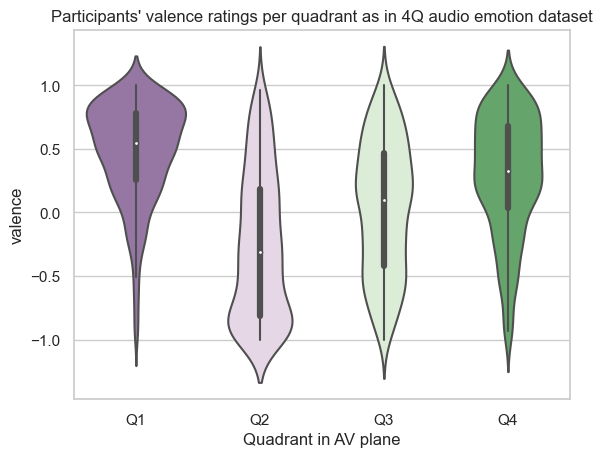

In [7]:
# plot violin plot valence and arousal ratings
import seaborn as sns
import matplotlib.pyplot as plt

# plot valence ratings

# order of columns 'Q1', 'Q2', 'Q3', 'Q4'
df['proj_quadrant'] = df['proj_quadrant'].astype("category")

sns.set(style="whitegrid")
sns.violinplot(y="valence", 
               x="proj_quadrant", data=df, palette="PRGn")

# tile plot
plt.title("Participants' valence ratings per quadrant as in 4Q audio emotion dataset")
# x label
plt.xlabel("Quadrant in AV plane")

/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Quadrant in AV plane')

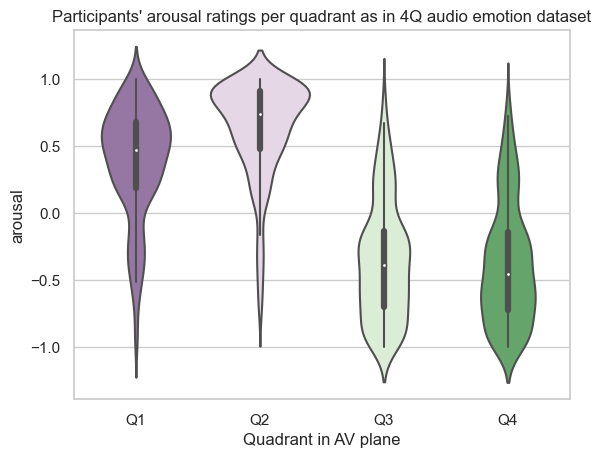

In [8]:
# plot arousal ratings

sns.set(style="whitegrid")
sns.violinplot(y="arousal", 
               x="proj_quadrant", data=df, palette="PRGn")

# tile plot
plt.title("Participants' arousal ratings per quadrant as in 4Q audio emotion dataset")
# x label
plt.xlabel("Quadrant in AV plane")

In [9]:
df

,Unnamed: 0,valence,arousal,part_quadrant,proj_quadrant
0,0,0.688259,0.903704,Q1,Q1
1,1,-0.291498,0.385185,Q2,Q3
2,2,0.842105,0.974074,Q1,Q1
3,3,-0.242915,0.959259,Q2,Q1
4,4,-0.959514,0.681481,Q2,Q4
...,...,...,...,...,...
91,91,-0.850932,0.971510,Q2,Q2
92,92,0.450311,0.601140,Q1,Q1
93,93,0.568323,-0.504274,Q4,Q4
94,94,0.630435,-0.632479,Q4,Q3


In [10]:
df.describe()

,Unnamed: 0,valence,arousal
count,1824.000000,1824.000000,1824.000000
mean,47.500000,0.137367,0.071401
std,27.718909,0.565153,0.610635
min,0.000000,-1.000000,-1.000000
25%,23.750000,-0.287162,-0.475082
50%,47.500000,0.226837,0.162034
75%,71.250000,0.606755,0.613181
max,95.000000,1.000000,1.000000


# Revision #1

/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Quadrant in AV plane')

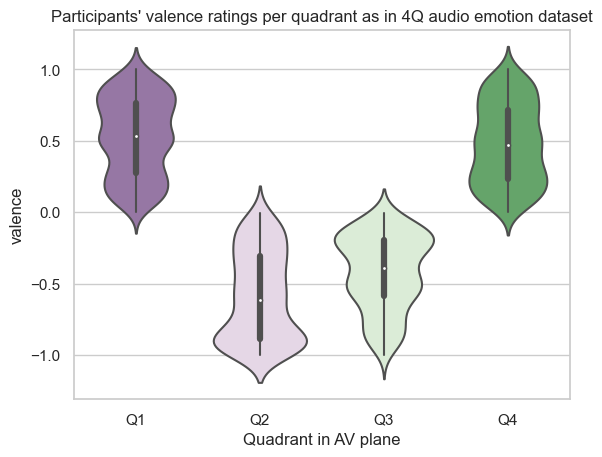

In [11]:
# plot violin plot valence and arousal ratings
import seaborn as sns
import matplotlib.pyplot as plt

# plot valence ratings

# order of columns 'Q1', 'Q2', 'Q3', 'Q4'
df['part_quadrant'] = df['part_quadrant'].astype("category")

sns.set(style="whitegrid")
sns.violinplot(y="valence", 
               x="part_quadrant", data=df, palette="PRGn")

# tile plot
plt.title("Participants' valence ratings per quadrant as in 4Q audio emotion dataset")
# x label
plt.xlabel("Quadrant in AV plane")

/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brunoleitao/anaconda3/envs/mvpa/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Quadrant in AV plane')

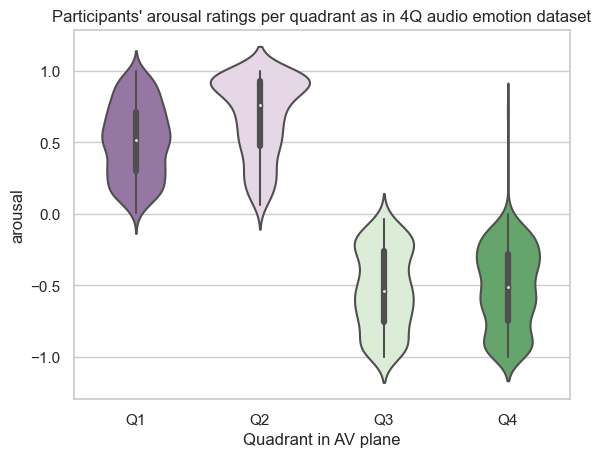

In [12]:
# plot violin plot valence and arousal ratings
import seaborn as sns
import matplotlib.pyplot as plt

# plot valence ratings

# order of columns 'Q1', 'Q2', 'Q3', 'Q4'
df['part_quadrant'] = df['part_quadrant'].astype("category")

sns.set(style="whitegrid")
sns.violinplot(y="arousal", 
               x="part_quadrant", data=df, palette="PRGn")

# tile plot
plt.title("Participants' arousal ratings per quadrant as in 4Q audio emotion dataset")
# x label
plt.xlabel("Quadrant in AV plane")